In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo 

1. Outlier Identification and Handling

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    65    0   3       140   417    1        2      157      0      0.8   
91    62    0   4       160   164    0        2      145      0      6.2   
121   63    0   4       150   407    0        2      154      0      4.0   
123   55    1   4       140   217    0        0      111      1      5.6   
126   56    0   4       200   288    1        2      133      1      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
181   56    0   4       134   409    0        2      150      1      1.9   
188   54    1   2       192   283    0        2      195      0      0.0   
245   67    1   4       120   237    0        0       71      0      1.0   

     slope   ca  thal  num  
48       1  1.0   3.0    0  
91       3  3.0   7.0    3  
121      2  3.0   7.0    4  
123      3  0.0   7.0    3  
126      3  2.0   7.0    3  
152      2  0.0   7.0    0  
181      2  2.0   7.0    2  
188    

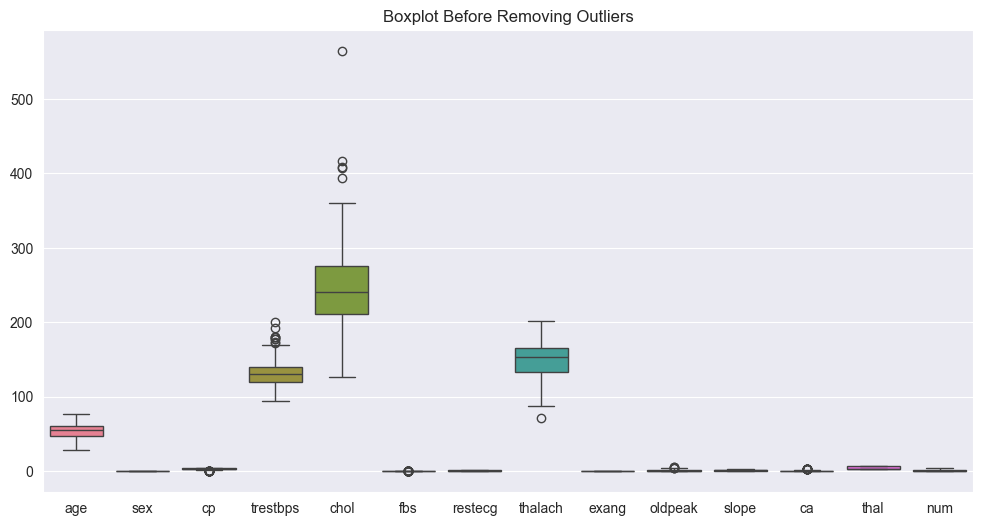

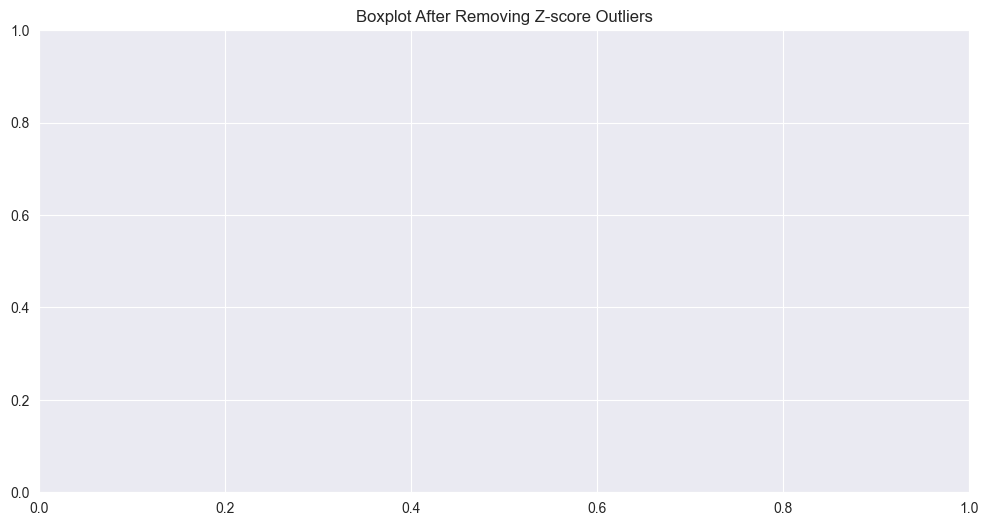

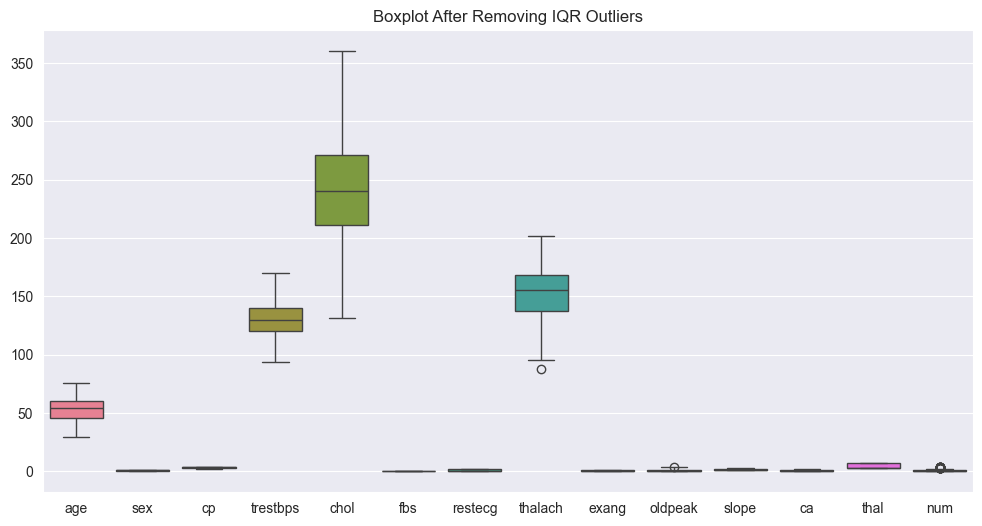

In [71]:
# This dataset is the "Heart Disease" dataset from UC Irvine

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# combining features and target into one dataframe
df = pd.concat([X, y], axis=1)

# displaying the first few rows of the dataframe
df.head()

# Method 1: Z-score

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for Z-scores
threshold = 3

# Identify outliers
outliers_z = np.where(z_scores > threshold)

# Display the rows with outliers
df_outliers_z = df.iloc[outliers_z[0]]
print(df_outliers_z)

# Method 2: IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Display the rows with outliers
df_outliers_iqr = df[outliers_iqr]
print(df_outliers_iqr)

# Remove outliers identified by Z-score
df_no_outliers_z = df[(z_scores < threshold).all(axis=1)]

# Remove outliers identified by IQR
df_no_outliers_iqr = df[~outliers_iqr]

# Display the shape of the datasets
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing Z-score outliers: {df_no_outliers_z.shape}")
print(f"Dataset shape after removing IQR outliers: {df_no_outliers_iqr.shape}")

# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot Before Removing Outliers')
plt.show()

# Boxplot after removing Z-score outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers_z.select_dtypes(include=[np.number]))
plt.title('Boxplot After Removing Z-score Outliers')
plt.show()

# Boxplot after removing IQR outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers_iqr.select_dtypes(include=[np.number]))
plt.title('Boxplot After Removing IQR Outliers')
plt.show()

2. Bias and Confounding Variables Identification:

The potential sources of bias in the heart disease dataset could include:
Selection Bias: If the dataset includes patients from only one region or hospital, it may not be representative of the general population.
Measurement Bias: Inaccurate measurement of variables like blood pressure or cholesterol levels can lead to biased results.
Confounding Variables: Factors such as age, gender, and lifestyle could confound the relationship between the predictors and the target variable (presence of heart disease).
These biases can impact the analysis of the data by skewing the results & making it difficult to generalize the findings to a broader population.


3. Handling Missing Data:

When dealing with missing data in a dataset, it's important to choose a method that ensures accurate analysis. One common approach is mean imputation, where missing values are replaced with the mean of observed values for that variable. While simple, mean imputation can introduce bias and underestimate variability if the missing data is not completely random. Another method, multiple imputation, generates multiple plausible values based on the observed data, offering more accurate estimates, especially when missing data are not random. The choice between these methods depends on factors like the nature of missing data and assumptions about their patterns. Justifying the selected method ensures the integrity of the analysis results.

4. Analysis of Mean and Median Values:

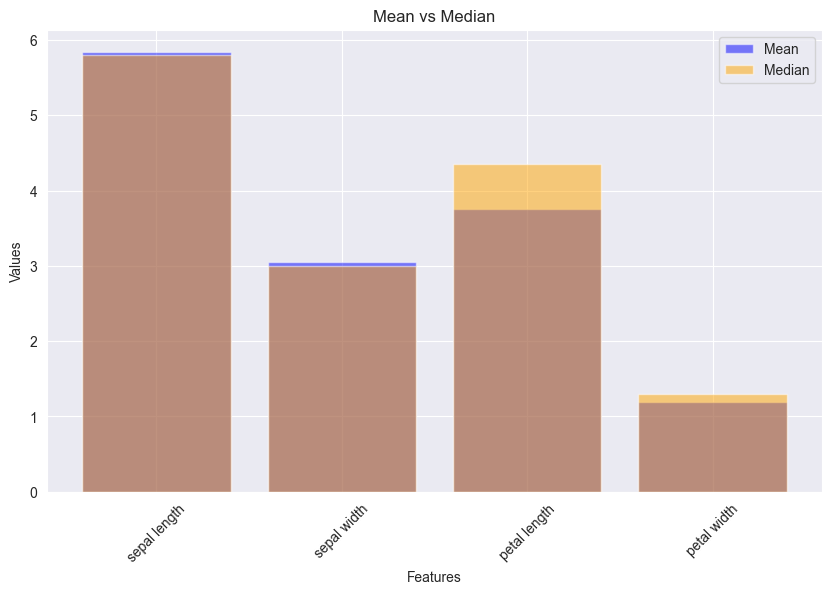

Mean values:
 sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

Median values:
 sepal length    5.80
sepal width     3.00
petal length    4.35
petal width     1.30
dtype: float64


In [72]:
# This dataset is the "Iris" dataset from UC Irvine

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# Creating a pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# Calculating mean and median
mean_values = df.mean()
median_values = df.median()

# Visualizing mean and median
plt.figure(figsize=(10, 6))
plt.bar(df.columns, mean_values, color='blue', alpha=0.5, label='Mean')
plt.bar(df.columns, median_values, color='orange', alpha=0.5, label='Median')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Mean vs Median')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Interpretation
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)



To fix the difference between the mean and median values in the dataset, we can try a few things. One idea is to spot and get rid of any weird outliers, those really high or low numbers that can mess up the average. Another way is to change the data a bit, like using math tricks to make it less lopsided. Or we could use a special kind of average called a "trimmed mean" that ignores a bit of the most extreme data. These tricks can help make the mean and median values more similar and give us a better picture of what's going on in the data.

5. Data Visualization:

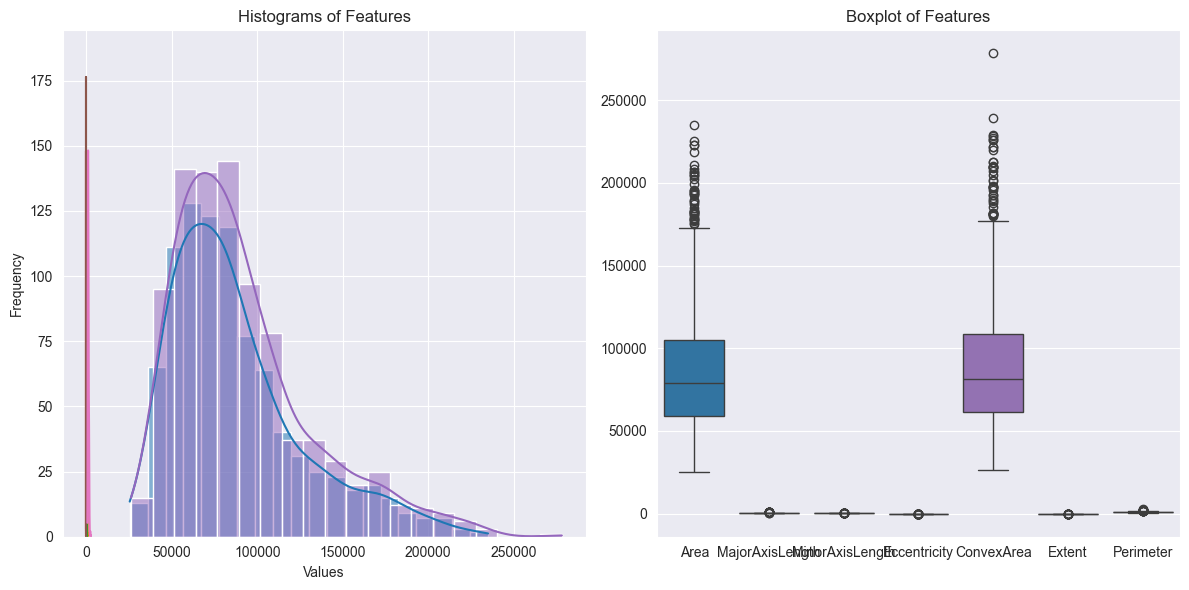

In [73]:
# This dataset is the "Raisin" dataset from UC Irvine

# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X = raisin.data.features 
y = raisin.data.targets 

# Creating a pandas DataFrame
df = pd.DataFrame(X, columns=raisin.feature_names)

# Basic visualizations
plt.figure(figsize=(12, 6))

# Histograms
plt.subplot(1, 2, 1)
for column in df.columns:
    sns.histplot(df[column], bins=20, kde=True)
plt.title('Histograms of Features')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df)
plt.title('Boxplot of Features')

plt.tight_layout()
plt.show()

The visuals I created help us see how the data is spread out. Histograms show how often different values show up, helping us spot any weird patterns or numbers that stick out. Box plots give us a quick idea of where most of the data lies and if there are any numbers that are really far from the rest. By looking at these pictures closely, we can get a better grip on how the data is arranged and if there's anything unusual going on.

6. Measures of Central Tendency and Variability:

In [74]:
# This dataset is the "Adult" dataset from UC Irvine

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# Creating a pandas DataFrame
df = pd.DataFrame(X, columns=adult.feature_names)

# Convert object columns to numeric if possible
df = df.apply(pd.to_numeric, errors='coerce')

# Calculating measures of central tendency
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

# Calculating measures of variability
range_values = df.max() - df.min()
variance_values = df.var()
std_dev_values = df.std()

# Interpretation
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)
print("\nRange values:\n", range_values)
print("\nVariance values:\n", variance_values)
print("\nStandard Deviation values:\n", std_dev_values)

Mean values:
 age                   38.643585
workclass                   NaN
fnlwgt            189664.134597
education                   NaN
education-num         10.078089
marital-status              NaN
occupation                  NaN
relationship                NaN
race                        NaN
sex                         NaN
capital-gain        1079.067626
capital-loss          87.502314
hours-per-week        40.422382
native-country              NaN
dtype: float64

Median values:
 age                   37.0
workclass              NaN
fnlwgt            178144.5
education              NaN
education-num         10.0
marital-status         NaN
occupation             NaN
relationship           NaN
race                   NaN
sex                    NaN
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
native-country         NaN
dtype: float64

Mode values:
 age                   36.0
workclass              NaN
fnlwgt            203488.0
education        

These measures help us figure out where most of the data lies and how spread out it is. The mean, median, and mode show us where the data tends to gather. The range tells us how much the data varies from the smallest to the largest values. Variance and standard deviation let us know how much the data points differ from the average. Looking at all these measures together helps us see how the data is spread out and how much it differs from what's typical.

7. Data Cleaning:

Missing Values Count:
displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


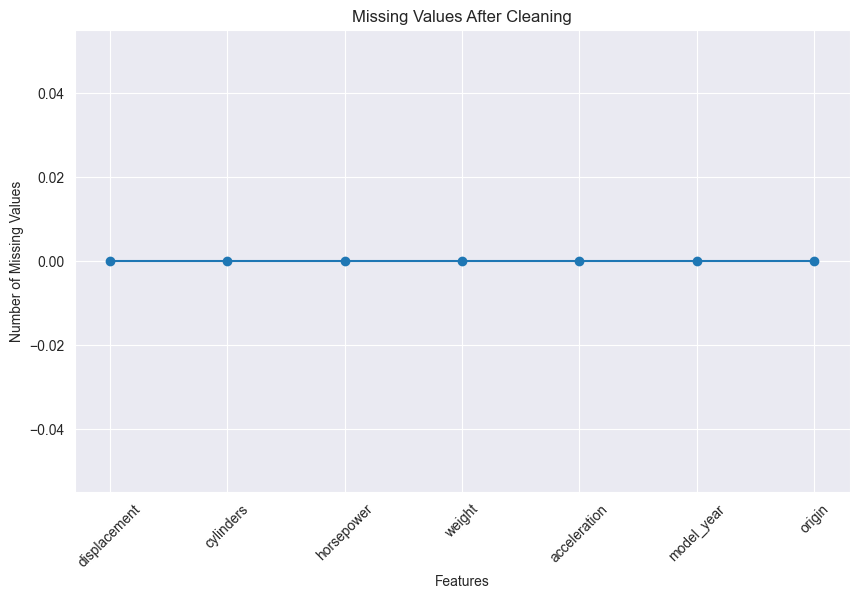

In [83]:
# This dataset is the "Auto MPG" dataset from UC Irvine

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)

# Extracting features and targets
X = auto_mpg.data.features
y = auto_mpg.data.targets

# data (as pandas dataframes) 
df = pd.DataFrame(X, columns=auto_mpg.feature_names)

# Handling missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Converting data types if needed (e.g., converting object types to numeric)
df = df.apply(pd.to_numeric, errors='coerce')

# Counting missing values after cleaning
missing_values_count = df.isnull().sum()

# Print the missing values count
print("Missing Values Count:")
print(missing_values_count)

# Visualizing the cleaned dataset
plt.figure(figsize=(10, 6))
plt.plot(df.isnull().sum(), marker='o', linestyle='-')
plt.title('Missing Values After Cleaning')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

8. Group Analysis:

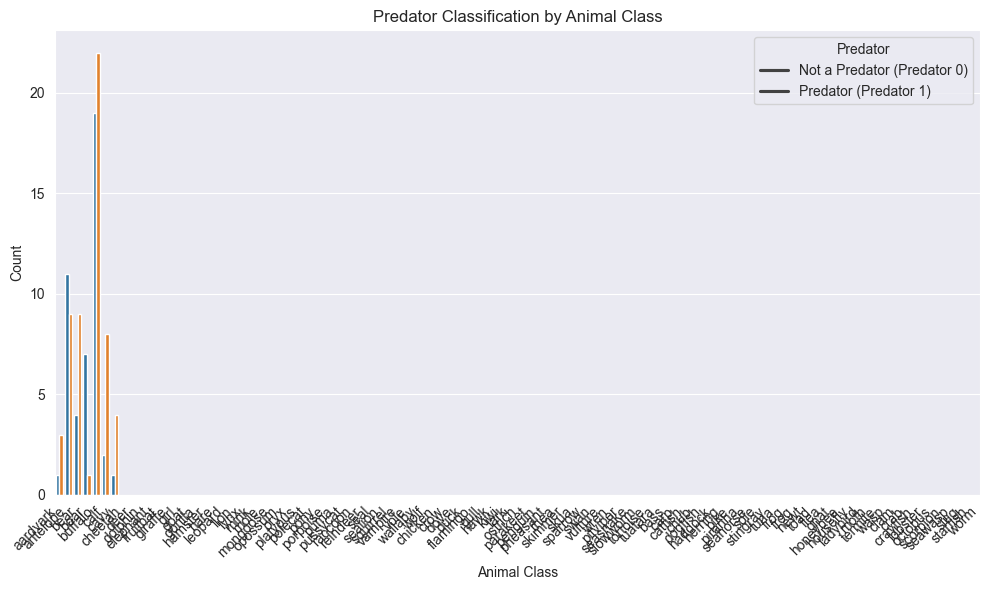

In [110]:
# This dataset is the "Zoo" dataset from UC Irvine


# fetch dataset 
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes) 
X = zoo.data.features
y = zoo.data.targets

# Creating a pandas DataFrame
df = pd.DataFrame(X, columns=zoo.feature_names)

# Adding the "animal_name" (ID) and "predator" (Feature) columns
df['animal_name'] = y

# Defining class labels
class_labels = {
    1: "Mammals",
    2: "Birds",
    3: "Reptiles",
    4: "Fish",
    5: "Amphibians",
    6: "Insects",
    7: "Other Aquatic Creatures"
}

# Adding animal names
animal_names = [
    "aardvark", "antelope", "bear", "boar", "buffalo", "calf", "cavy", "cheetah", "deer", "dolphin", 
    "elephant", "fruitbat", "giraffe", "girl", "goat", "gorilla", "hamster", "hare", "leopard", "lion", 
    "lynx", "mink", "mole", "mongoose", "opossum", "oryx", "platypus", "polecat", "pony", "porpoise", 
    "puma", "pussycat", "raccoon", "reindeer", "seal", "sealion", "squirrel", "vampire", "vole", "wallaby", 
    "wolf", "chicken", "crow", "dove", "duck", "flamingo", "gull", "hawk", "kiwi", "lark", "ostrich", 
    "parakeet", "penguin", "pheasant", "rhea", "skimmer", "skua", "sparrow", "swan", "vulture", "wren", 
    "pitviper", "seasnake", "slowworm", "tortoise", "tuatara", "bass", "carp", "catfish", "chub", "dogfish", 
    "haddock", "herring", "pike", "piranha", "seahorse", "sole", "stingray", "tuna", "frog", "frog", "newt", "toad", 
    "flea", "gnat", "honeybee", "housefly", "ladybird", "moth", "termite", "wasp", "clam", "crab", "crayfish", 
    "lobster", "octopus", "scorpion", "seawasp", "slug", "starfish", "worm"
]

# Adding class labels and animal names to the DataFrame
df['class_label'] = df['animal_name'].apply(lambda x: class_labels[x])
df['animal'] = animal_names

# Grouping the data by "class_label" and "predator"
grouped_df = df.groupby(['class_label', 'predator']).size().reset_index(name='count')

# Visualizing the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='class_label', y='count', hue='predator')
plt.title('Predator Classification by Animal Class')
plt.xlabel('Animal Class')
plt.ylabel('Count')

# Adding animal names to the x-axis labels
plt.xticks(range(len(animal_names)), animal_names, rotation=45, ha='right')

# Adding a clear legend
plt.legend(title='Predator', loc='upper right', labels=['Not a Predator (Predator 0)', 'Predator (Predator 1)'])

plt.tight_layout()
plt.show()


The bar chart shows how many animals in each group are classified as predators. It helps us see if there are any differences in predator numbers across different types of animals.